In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

- **exploring CUSTOMER DEOGRAPHIC column**

In [3]:
C_D=pd.read_csv('KPMG_VI_New_raw_data_update_final - CustomerDemographic.csv')

In [4]:
C_D.shape

(4000, 13)

In [5]:
C_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [6]:
C_D.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [7]:
C_D['customer_id'].nunique()

4000

In [8]:
C_D["first_name"].nunique()

3139

In [9]:
C_D["last_name"].nunique()

3725

In [10]:
C_D["gender"].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [11]:
C_D["past_3_years_bike_related_purchases"].nunique()

100

In [12]:
C_D['past_3_years_bike_related_purchases'].value_counts()

past_3_years_bike_related_purchases
16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: count, Length: 100, dtype: int64

In [13]:
C_D["DOB"].nunique()

3448

In [14]:
C_D["job_title"].nunique()

195

In [15]:
C_D['job_industry_category'].value_counts()

job_industry_category
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

In [16]:
C_D['job_industry_category'].nunique()

9

In [17]:
C_D['wealth_segment'].value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: count, dtype: int64

In [18]:
C_D['deceased_indicator'].value_counts()

deceased_indicator
N    3998
Y       2
Name: count, dtype: int64

In [19]:
C_D['default'].nunique() #we needs to drop the coulms because it have wrong  values

101

In [20]:
C_D['owns_car'].value_counts()

owns_car
Yes    2024
No     1976
Name: count, dtype: int64

In [21]:
C_D['tenure'].unique()

array([11., 16., 15.,  7.,  8., 13., 20.,  9.,  6.,  1., 18., 21., 12.,
       19., 14.,  4., 22.,  5., 17.,  2.,  3., 10., nan])

In [22]:
C_D.isnull().sum() #checking null values

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [23]:
C_D.duplicated().sum() #checking Duplicates

0

- **exploring CUSTOMER ADDRESS column**

In [25]:
C_A=pd.read_csv("KPMG_VI_New_raw_data_update_final - CustomerAddress.csv")

In [26]:
C_A.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [27]:
C_A.shape

(3999, 6)

In [28]:
C_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [29]:
C_A['customer_id'].nunique()

3999

In [30]:
C_A['address'].nunique()

3996

In [31]:
C_A['postcode'].nunique()

873

In [32]:
C_A['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [33]:
C_A['country'].nunique()#we can delete because there is only one value

1

In [34]:
C_A['property_valuation'].nunique()

12

In [35]:
C_A['property_valuation'].value_counts()

property_valuation
9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: count, dtype: int64

In [36]:
C_A.isnull().sum()#checking null values

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [37]:
C_A.duplicated().sum()#checking duplicates

0

- **For making one single table now we will merge both the above table to get complete data**

In [39]:
R_D= pd.merge(C_D,C_A,how="outer",on=("customer_id"))

In [40]:
R_D.shape

(4003, 18)

In [41]:
R_D.duplicated().sum()

0

In [42]:
R_D.columns.tolist()

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'default',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation']

In [43]:
continous=['property_valuation']
categorical=['first_name','last_name','gender','DOB','job_title','job_industry_category','wealth_segment','deceased_indicator','default','owns_car','address', 'state', 'country']
count=['customer_id',"postcode",'past_3_years_bike_related_purchases','tenure']

# Data Exploration

In [45]:
R_D[continous].describe()

,property_valuation
count,3999.000000
mean,7.514379
std,2.824663
min,1.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,12.000000


In [46]:
R_D[categorical].describe()

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,address,state,country
count,4000,3875,4000,3913,3494,3344,4000,4000,3698,4000,3999,3999,3999
unique,3139,3725,6,3448,195,9,3,2,101,2,3996,5,1
top,Max,Pristnor,Female,1978-01-30,Business Systems Development Analyst,Manufacturing,Mass Customer,N,1.00E+02,Yes,3 Mariners Cove Terrace,NSW,Australia
freq,5,3,2037,7,45,799,2000,3998,111,2024,2,2054,3999


# Data Cleaning

In [48]:
R_D.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93.0,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81.0,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61.0,1954-01-20,Recruiting Manager,Property,Mass Customer,N,1-Feb,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33.0,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56.0,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [49]:
R_D.drop(columns=['default','country','postcode','address'],inplace=True)

In [50]:
R_D['gender'].unique().tolist()

['F', 'Male', 'Female', 'U', 'Femal', 'M', nan]

In [51]:
R_D['gender'].replace({"Male":"M", 'Female':'F', "Femal":"F", "U":"F" },inplace=True)

In [52]:
R_D['gender'].isnull().sum()

3

In [53]:
R_D['gender'].fillna('F',inplace=True)

In [54]:
R_D['gender'].value_counts()

gender
F    2130
M    1873
Name: count, dtype: int64

In [55]:
R_D['job_title'].fillna("Others",inplace=True)

In [56]:
R_D['job_industry_category'].fillna("Others",inplace=True)

In [57]:
R_D['first_name'].fillna("NA",inplace=True)              

In [58]:
R_D['last_name'].fillna("NA",inplace=True)

In [59]:
R_D.dropna(inplace=True)

In [60]:
R_D.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
dtype: int64

In [61]:
R_D['DOB'] = pd.to_datetime(R_D['DOB'], errors='coerce')  #converting DOB to Age
#chatgpt
today = pd.Timestamp.today()
R_D['Age'] = (today - R_D['DOB']).dt.days // 365

<Axes: ylabel='past_3_years_bike_related_purchases'>

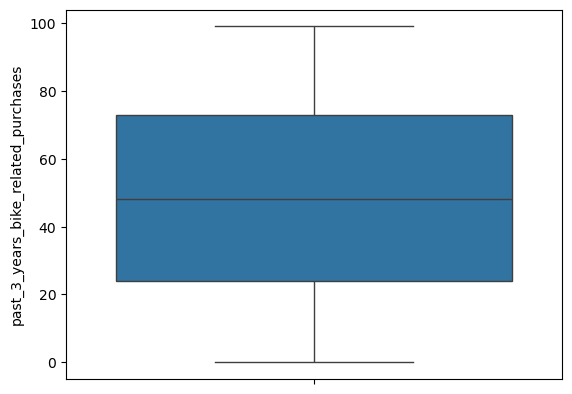

In [62]:
sns.boxplot(R_D['past_3_years_bike_related_purchases'])

<Axes: ylabel='tenure'>

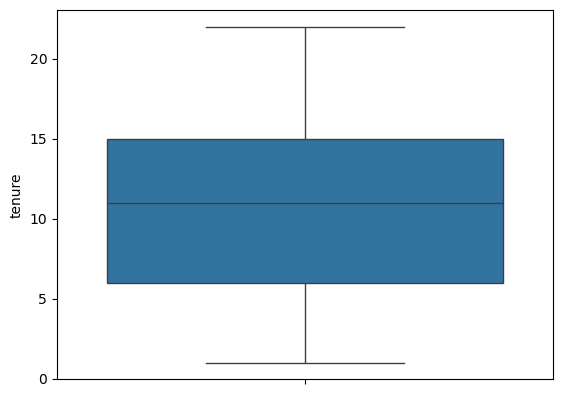

In [63]:
sns.boxplot(R_D['tenure'])

<Axes: ylabel='Age'>

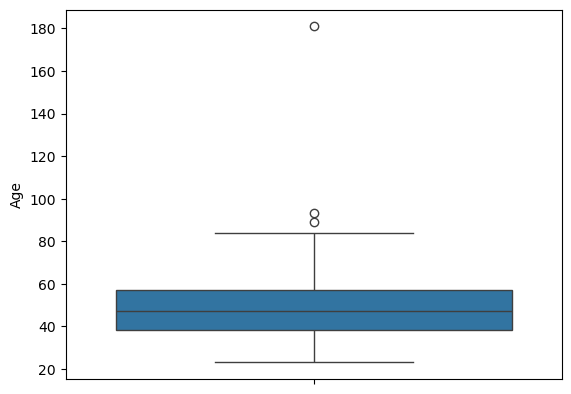

In [64]:
sns.boxplot(R_D['Age'])

In [65]:
iqr=R_D['Age'].quantile(0.75)-R_D['Age'].quantile(0.25)
ul=R_D['Age'].quantile(0.75)+(1.5*iqr)
ll=R_D['Age'].quantile(0.25)-(1.5*iqr)

In [66]:
ul

85.5

In [67]:
R_D[R_D['Age']>ul]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age
33,34,Jephthah,Bachmann,F,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,QLD,8.0,181
719,720,Darrel,Canet,M,67.0,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,NSW,10.0,93
1091,1092,Katlin,Creddon,F,56.0,1935-08-22,VP Quality Control,Retail,Mass Customer,N,No,5.0,VIC,3.0,89


In [68]:
R_D[R_D["deceased_indicator"]=='Y']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,state,property_valuation,Age
752,753,Josy,St. Quentin,F,82.0,1970-03-07,Food Chemist,Health,Affluent Customer,Y,Yes,6.0,NSW,3.0,55
3789,3790,Kurtis,Morson,M,91.0,1959-05-31,Senior Editor,Retail,Mass Customer,Y,Yes,9.0,VIC,3.0,66


In [69]:
R_D = R_D.drop(index=[33,752,3789])

In [70]:
R_D=R_D.drop(columns=["DOB",'deceased_indicator'])

# Exploring and cleaning NEWCOSTUMER Dataset

In [72]:
N_C=pd.read_csv('KPMG_VI_New_raw_data_update_final - NewCustomerList.csv')

In [73]:
N_C.shape

(1000, 23)

In [74]:
N_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [75]:
N_C["first_name"].nunique()

940

In [76]:
N_C["last_name"].nunique()

961

In [77]:
N_C["gender"].value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

In [78]:
N_C["past_3_years_bike_related_purchases"].nunique()

100

In [79]:
N_C["DOB"].nunique()

958

In [80]:
N_C["job_title"].nunique()

184

In [81]:
N_C["job_industry_category"].value_counts()

job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [82]:
N_C["wealth_segment"].value_counts()

wealth_segment
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: count, dtype: int64

In [83]:
N_C["deceased_indicator"].nunique()

1

In [84]:
N_C["owns_car"].value_counts()

owns_car
No     507
Yes    493
Name: count, dtype: int64

In [85]:
N_C["tenure"].nunique()

23

In [86]:
N_C["tenure"].value_counts()

tenure
9     79
13    74
11    68
10    63
12    61
5     60
7     60
17    59
15    58
8     55
14    54
16    49
6     45
4     36
18    36
19    34
3     26
21    24
20    22
2     15
22    12
1      8
0      2
Name: count, dtype: int64

In [87]:
N_C["address"].nunique()

1000

In [88]:
N_C["postcode"].nunique()

522

In [89]:
N_C["state"].value_counts()

state
NSW    506
VIC    266
QLD    228
Name: count, dtype: int64

In [90]:
N_C["country"].value_counts()

country
Australia    1000
Name: count, dtype: int64

In [91]:
N_C["property_valuation"].value_counts()

property_valuation
9.0     173
8.0     162
7.0     138
10.0    116
6.0      70
11.0     62
5.0      57
4.0      53
3.0      51
12.0     46
2.0      42
1.0      30
Name: count, dtype: int64

In [92]:
N_C["property_valuation"].nunique()

12

In [93]:
N_C.duplicated().sum()#checking duplictes

0

In [94]:
N_C.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [95]:
N_C["gender"].replace({"U":"F","Female":"F","Male":"M"},inplace=True)

In [96]:
N_C["gender"].value_counts()

gender
F    530
M    470
Name: count, dtype: int64

In [97]:
N_C["last_name"].fillna("NA",inplace=True)

In [98]:
N_C["job_industry_category"].fillna("Others",inplace=True)

In [99]:
N_C["job_title"].fillna("Others",inplace=True)

In [100]:
N_C.dropna(inplace=True)

In [101]:
N_C.drop(columns=['Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20','address', 'postcode', 'country',
 'Rank',
 'Value'],inplace=True)

In [102]:
N_C['DOB'] = pd.to_datetime(N_C['DOB'], errors='coerce')
#Chatgpt
today = pd.Timestamp.today()
N_C['Age'] = (today - N_C['DOB']).dt.days // 365

In [103]:
N_C.drop(columns=["DOB"],inplace=True)

In [104]:
N_C.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
state                                  0
property_valuation                     0
Age                                    0
dtype: int64

In [105]:
N_C.shape

(983, 13)

# Transactions Data Cleaning and Exploraton

In [107]:
T=pd.read_csv('KPMG_VI_New_raw_data_update_final - Transactions.csv')

In [108]:
T.shape

(20000, 13)

In [109]:
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   product_id               20000 non-null  int64  
 2   customer_id              20000 non-null  int64  
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 2.0+ MB


In [110]:
T['transaction_id'].nunique()

20000

In [111]:
T['product_id'].unique()

array([  0,   2,  69,  74,  33,  22,  40,  32,  44,  62,   1,  57,  36,
        67,  50,  91,  83,  12,  99,  98,  18,  78,  73,  29,   5,  16,
        25,   4,  82,  41,  38,  76,   9,  79,  37,  11,  80,  97,  48,
        35,  15,  20,  85,  42,  66,  63,  94,  89,  70,  92,  72,  86,
        23,  14,  64,  53, 100,  24,  96,  10,  59,  90,  84,  54,  47,
        27,  65,  60,  55,  31,  93,   6,  58,  49,   3,  26,  43,  51,
         8,  71,  34,  52,  61,  45,  19,  30,  21,  39,  28,  88,  95,
        46,  68,  81,  77,  56,  13,  17,   7,  75,  87], dtype=int64)

In [112]:
T['product_id'].nunique()

101

In [113]:
T['customer_id'].nunique()

3494

In [114]:
T[T['customer_id']>4000]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,16701,0,5034,27/1/2017,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.2999878,35667.0
2,17469,0,5034,3/1/2017,False,Approved,OHM Cycles,Road,medium,medium,742.54,667.4000244,33879.0


In [115]:
T['transaction_date'].nunique()

364

In [116]:
T['online_order'].value_counts()

online_order
True     9829
False    9811
Name: count, dtype: int64

In [117]:
T['order_status'].value_counts()

order_status
Approved     19821
Cancelled      179
Name: count, dtype: int64

In [118]:
T['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [119]:
T['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [120]:
T['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [121]:
T['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [122]:
T['list_price'].nunique()

296

In [123]:
T['standard_cost'].nunique()

103

In [124]:
T.duplicated().sum()

0

In [125]:
T.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [126]:
T['standard_cost']=T['standard_cost'].str.replace('$','').str.replace(',','')

In [127]:
T['standard_cost']=T['standard_cost'].astype(float)

In [128]:
T['profit']=T['list_price']-T['standard_cost']

- **Data Exploration**

In [130]:
C = ['list_price','standard_cost','profit']
DC = ['online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size']

In [131]:
T[DC].describe()

,online_order,order_status,brand,product_line,product_class,product_size
count,19640,20000,19803,19803,19803,19803
unique,2,2,6,4,3,3
top,True,Approved,Solex,Standard,medium,medium
freq,9829,19821,4253,14176,13826,12990


In [132]:
T[C].describe()

,list_price,standard_cost,profit
count,20000.000000,19803.000000,19803.000000
mean,1107.829449,556.046951,551.950915
std,582.825242,405.955660,493.412849
min,12.010000,7.210000,4.800000
25%,575.270000,215.140000,133.780000
50%,1163.890000,507.580000,445.210000
75%,1635.300000,795.100000,830.240000
max,2091.470000,1759.850000,1702.550000


<Axes: >

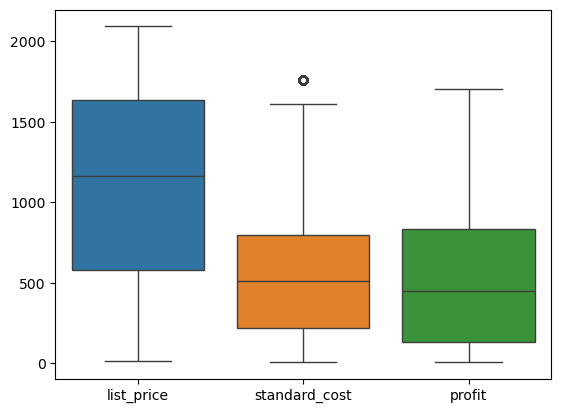

In [133]:
sns.boxplot(T[C])

In [134]:
len(T[(T['standard_cost']>1665)])

195

In [135]:
T['online_order'].fillna(True,inplace=True)

In [136]:
T['online_order'].value_counts()

online_order
True     10189
False     9811
Name: count, dtype: int64

In [137]:
T['transaction_date'] = pd.to_datetime(T['transaction_date'], dayfirst=True)
T['months'] = T['transaction_date'].dt.strftime('%B')  # Full month name

In [138]:
T.dropna(inplace=True)

In [139]:
T.drop(columns=['transaction_date','product_first_sold_date'],inplace=True)

# Mearging Datasets

In [141]:
D=pd.merge(T,R_D,how='outer',on='customer_id')

In [142]:
D.dropna(inplace=True)

In [143]:
D['customer_id'].nunique()

3411

In [144]:
R_D['customer_id'].nunique()

3906

In [145]:
T['customer_id'].nunique()

3494

In [146]:
D.drop(columns=['transaction_id',
 'product_id', 'first_name',
 'last_name', 'list_price',
 'standard_cost', 'job_title', 'owns_car',
 'tenure', 'property_valuation'],inplace=True)

In [147]:
R_D['Age_category'] = pd.cut(R_D['Age'],bins=[0,12,21,30,60,90],labels=['child','teen','middle','old','senior'])

# Data Analysis

In [149]:
R_D['owns_car'].value_counts()

owns_car
Yes    1969
No     1937
Name: count, dtype: int64

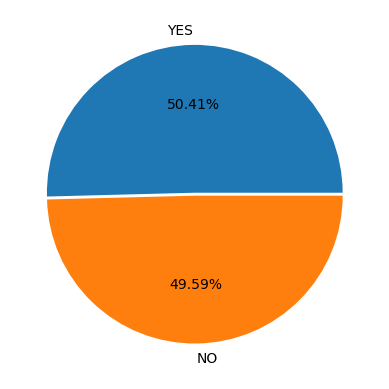

In [150]:
plt.pie(R_D['owns_car'].value_counts(),labels=["YES",'NO'],autopct='%0.2f%%',explode=[0.01,0.01])
plt.show()

In [151]:
R_D['gender'].value_counts()

gender
F    2036
M    1870
Name: count, dtype: int64

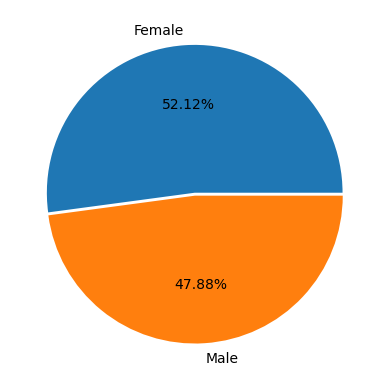

In [152]:
plt.pie(R_D['gender'].value_counts(),labels=["Female",'Male'],autopct='%0.2f%%',explode=[0.01,0.01])
plt.show()

In [153]:
R_D['past_3_years_bike_related_purchases'].value_counts()

past_3_years_bike_related_purchases
19.0    55
16.0    55
20.0    53
67.0    52
2.0     50
        ..
85.0    27
86.0    27
8.0     27
95.0    26
92.0    24
Name: count, Length: 100, dtype: int64

In [154]:
R_D['job_industry_category'].value_counts()

job_industry_category
Manufacturing         796
Financial Services    766
Others                655
Health                595
Retail                357
Property              266
IT                    150
Entertainment         136
Argiculture           113
Telecommunications     72
Name: count, dtype: int64

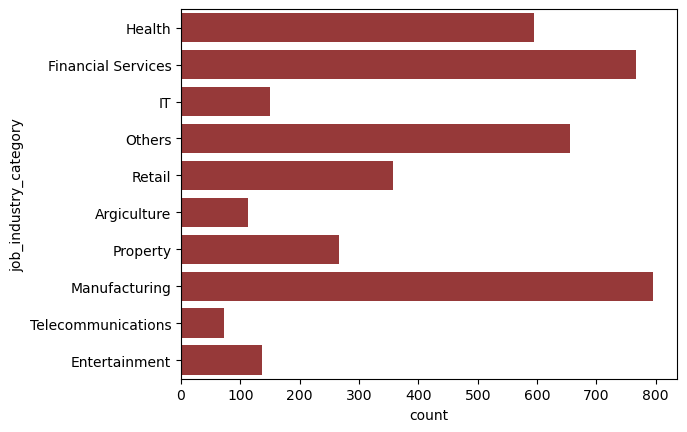

In [155]:
sns.countplot(R_D['job_industry_category'],color='brown')
plt.show()

In [156]:
R_D['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1950
High Net Worth        995
Affluent Customer     961
Name: count, dtype: int64

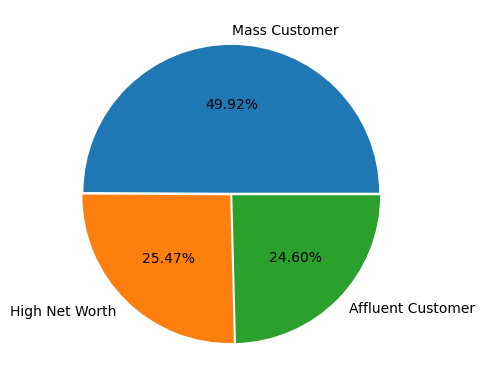

In [157]:
plt.pie(R_D['wealth_segment'].value_counts(),labels=['Mass Customer', 'High Net Worth', 'Affluent Customer']
,autopct='%0.2f%%',explode=[0.01,0.01,0.01])
plt.show()

In [158]:
R_D['state'].value_counts()

state
NSW                2003
VIC                 918
QLD                 821
New South Wales      85
Victoria             79
Name: count, dtype: int64

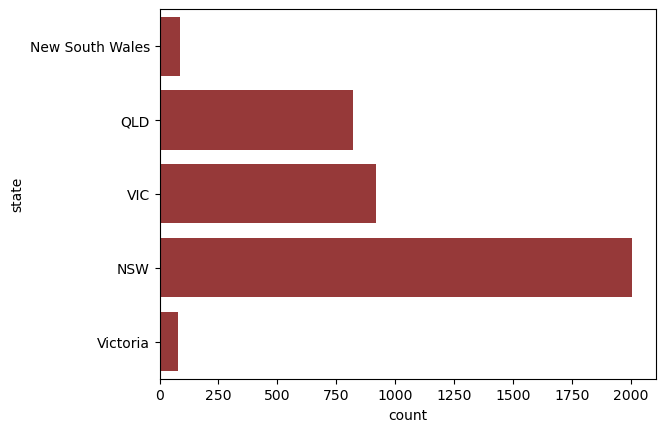

In [159]:
sns.countplot(R_D['state'],color='brown')
plt.show()

In [160]:
R_D['Age'].describe()

count    3906.000000
mean       47.372248
std        12.624273
min        23.000000
25%        38.000000
50%        47.000000
75%        57.000000
max        93.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='Count'>

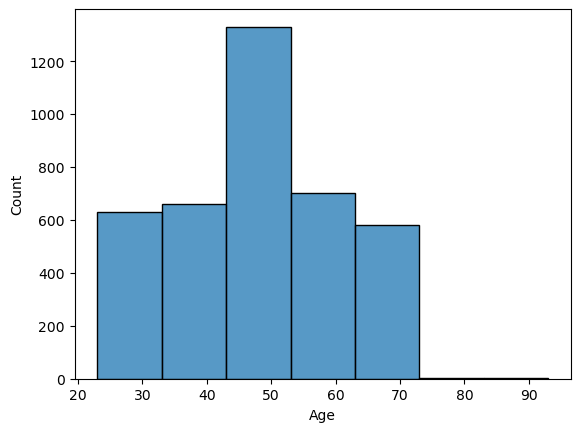

In [161]:
sns.histplot(R_D['Age'],bins=7)

In [162]:
T['online_order'].value_counts()

online_order
True     10097
False     9706
Name: count, dtype: int64

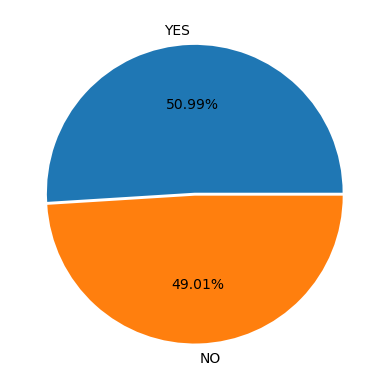

In [163]:
plt.pie(T['online_order'].value_counts(),labels=['YES','NO']
,autopct='%0.2f%%',explode=[0.01,0.01])
plt.show()

In [164]:
T['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

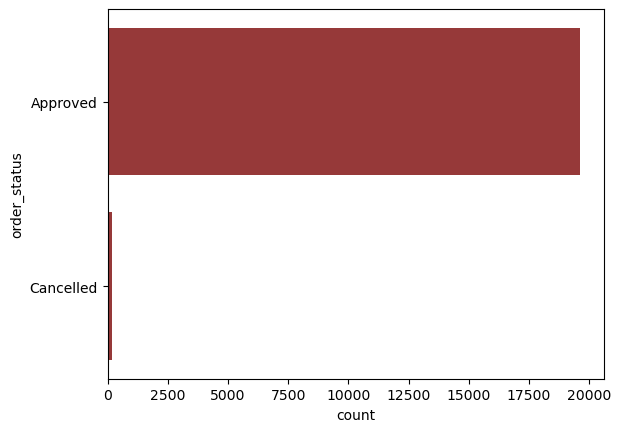

In [165]:
sns.countplot(T['order_status'],color='brown')
plt.show()

In [166]:
T['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

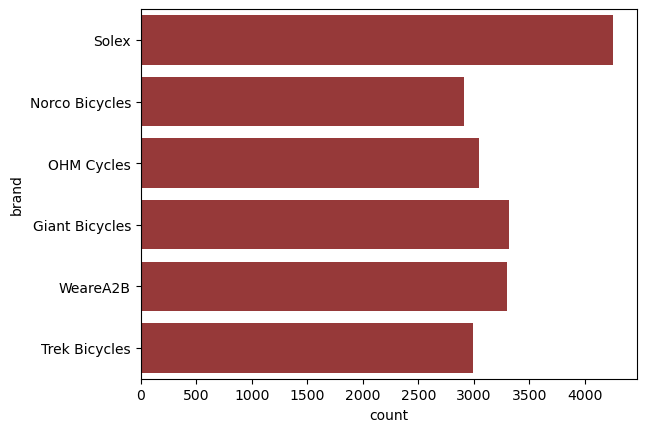

In [167]:
sns.countplot(T['brand'],color='brown')
plt.show()

In [168]:
T['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

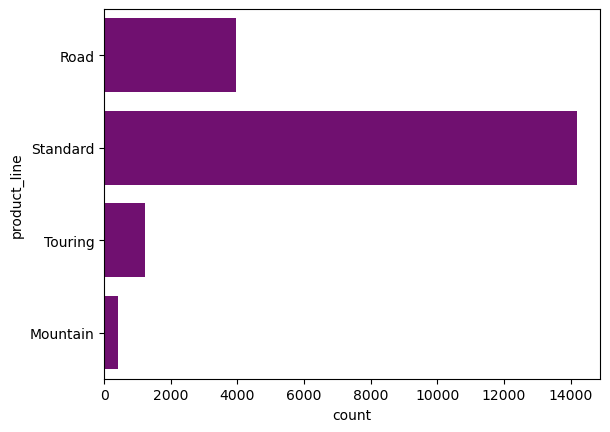

In [169]:
sns.countplot(T['product_line'],color='purple')
plt.show()

In [170]:
T['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

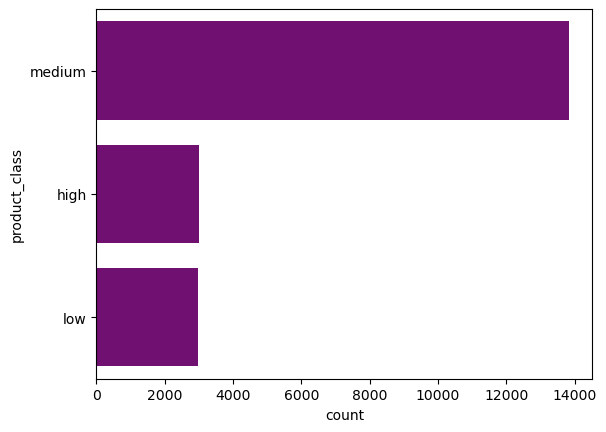

In [171]:
sns.countplot(T['product_class'],color='purple')
plt.show()

In [172]:
T['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

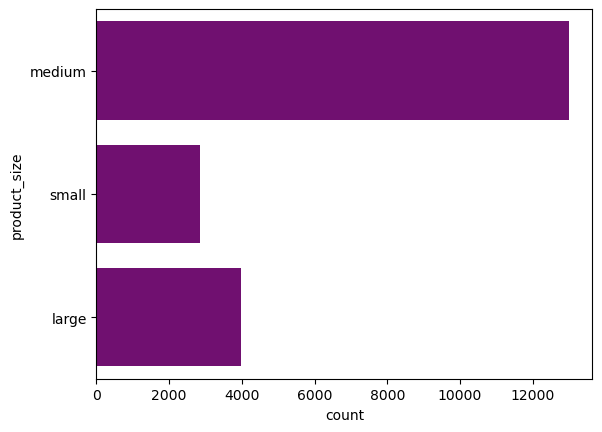

In [173]:
sns.countplot(T['product_size'],color='purple')
plt.show()

In [174]:
T['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

<Axes: xlabel='profit', ylabel='Count'>

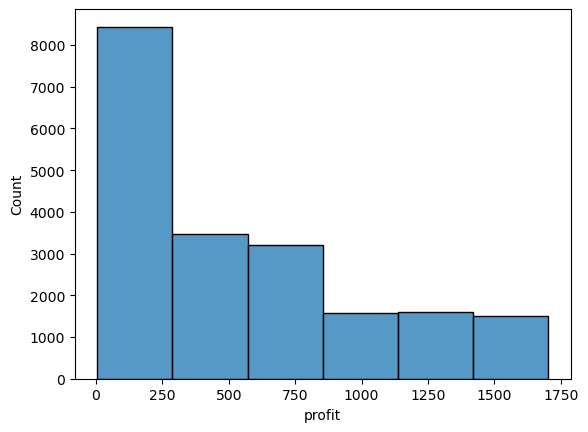

In [175]:
sns.histplot(T['profit'],bins=6)

In [176]:
T['months'].value_counts()

months
October      1751
August       1735
July         1700
May          1666
January      1665
November     1648
April        1641
December     1633
March        1629
February     1612
June         1564
September    1559
Name: count, dtype: int64

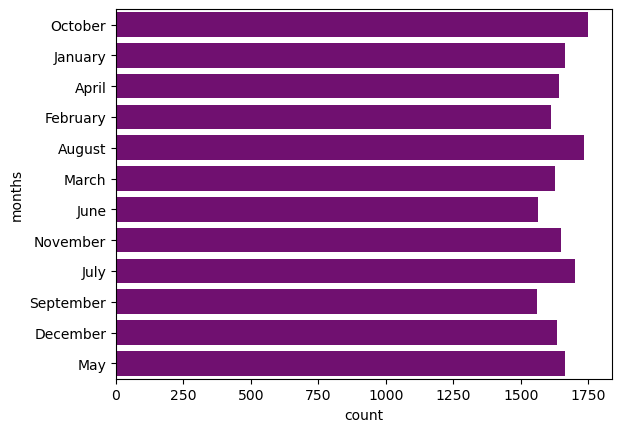

In [177]:
sns.countplot(T['months'],color='purple')
plt.show()

In [178]:
type(T['months'])

pandas.core.series.Series

In [179]:
pd.crosstab(D['online_order'],D["order_status"],margins=1)

order_status,Approved,Cancelled,All
online_order,,,
False,9399,74,9473
True,9746,101,9847
All,19145,175,19320


In [180]:
pd.crosstab(D['online_order'],D["brand"],margins=1)

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,All
online_order,,,,,,,
False,1565,1414,1393,2078,1436,1587,9473
True,1671,1412,1581,2092,1477,1614,9847
All,3236,2826,2974,4170,2913,3201,19320


In [181]:
pd.crosstab(D['online_order'],D["product_line"],margins=1)

product_line,Mountain,Road,Standard,Touring,All
online_order,,,,,
False,189,1886,6823,575,9473
True,223,1985,7023,616,9847
All,412,3871,13846,1191,19320


In [182]:
pd.crosstab(D['online_order'],D["product_class"],margins=1)

product_class,high,low,medium,All
online_order,,,,
False,1406,1373,6694,9473
True,1539,1531,6777,9847
All,2945,2904,13471,19320


In [183]:
pd.crosstab(D['online_order'],D["product_size"],margins=1)

product_size,large,medium,small,All
online_order,,,,
False,1931,6211,1331,9473
True,1948,6469,1430,9847
All,3879,12680,2761,19320


In [184]:
pd.crosstab(D['online_order'],R_D["job_industry_category"],margins=1)

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Others,Property,Retail,Telecommunications,All
online_order,,,,,,,,,,,
False,59,60,403,277,81,386,301,125,162,29,1883
True,51,70,340,304,64,385,331,134,188,43,1910
All,110,130,743,581,145,771,632,259,350,72,3793


In [185]:
pd.crosstab(D['online_order'],R_D["wealth_segment"],margins=1)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
online_order,,,,
False,466,488,929,1883
True,459,479,972,1910
All,925,967,1901,3793


In [186]:
pd.crosstab(D['online_order'],R_D["state"],margins=1)

state,NSW,New South Wales,QLD,VIC,Victoria,All
online_order,,,,,,
False,952,37,421,433,40,1883
True,1004,31,379,457,39,1910
All,1956,68,800,890,79,3793


In [187]:
D.groupby('online_order')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
online_order,,,,,,,,
False,9473.0,553.460395,493.615041,4.8,133.78,445.21,830.24,1702.55
True,9847.0,547.657452,492.244809,4.8,133.78,445.21,827.16,1702.55


In [188]:
D.groupby('online_order')["profit"].sum()

online_order
False    5.242930e+06
True     5.392783e+06
Name: profit, dtype: float64

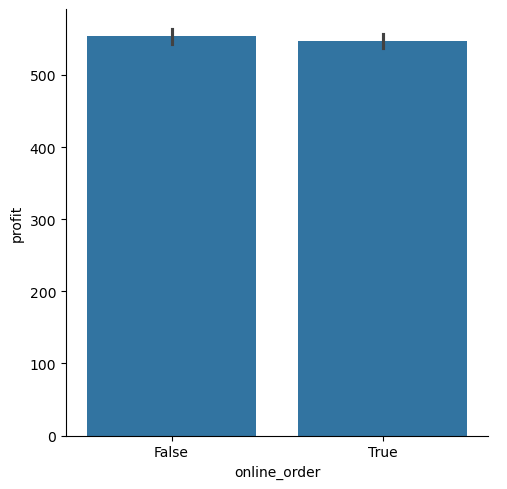

In [189]:
sns.catplot(x=D['online_order'],y=D['profit'],kind='bar')

In [190]:
pd.crosstab(D['brand'],D["product_line"],margins=1)

product_line,Mountain,Road,Standard,Touring,All
brand,,,,,
Giant Bicycles,0,568,2496,172,3236
Norco Bicycles,195,895,1736,0,2826
OHM Cycles,0,763,1986,225,2974
Solex,0,528,3444,198,4170
Trek Bicycles,217,963,1733,0,2913
WeareA2B,0,154,2451,596,3201
All,412,3871,13846,1191,19320


In [191]:
pd.crosstab(D['brand'],D["product_class"],margins=1)

product_class,high,low,medium,All
brand,,,,
Giant Bicycles,765,193,2278,3236
Norco Bicycles,546,618,1662,2826
OHM Cycles,763,596,1615,2974
Solex,555,404,3211,4170
Trek Bicycles,316,766,1831,2913
WeareA2B,0,327,2874,3201
All,2945,2904,13471,19320


In [192]:
pd.crosstab(D['brand'],D["product_size"],margins=1)

product_size,large,medium,small,All
brand,,,,
Giant Bicycles,927,1741,568,3236
Norco Bicycles,397,1687,742,2826
OHM Cycles,194,2583,197,2974
Solex,1064,2926,180,4170
Trek Bicycles,881,1500,532,2913
WeareA2B,416,2243,542,3201
All,3879,12680,2761,19320


In [193]:
D.groupby('brand')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,3236.0,474.802608,348.795569,41.13,198.22,448.68,641.64,1230.27
Norco Bicycles,2826.0,296.829883,254.523443,64.51,90.10,182.81,445.21,830.24
OHM Cycles,2974.0,484.739149,504.904772,4.80,91.15,199.10,771.12,1592.19
Solex,4170.0,564.907570,469.262309,17.87,179.44,437.46,751.02,1612.25
Trek Bicycles,2913.0,616.774844,598.100481,75.48,133.38,195.34,903.11,1702.55
WeareA2B,3201.0,833.010575,535.373355,15.08,155.65,834.94,1230.30,1660.88


In [194]:
D.groupby('brand')["profit"].sum()

brand
Giant Bicycles    1.536461e+06
Norco Bicycles    8.388412e+05
OHM Cycles        1.441614e+06
Solex             2.355665e+06
Trek Bicycles     1.796665e+06
WeareA2B          2.666467e+06
Name: profit, dtype: float64

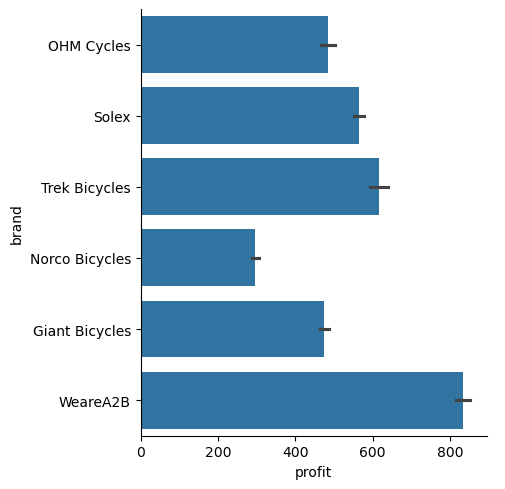

In [195]:
sns.catplot(y=D['brand'],x=D['profit'],kind='bar')
plt.show()

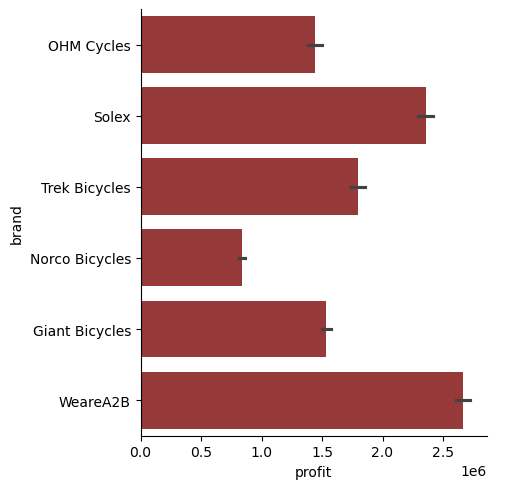

In [196]:
sns.catplot(y=D['brand'],x=D['profit'],kind='bar',estimator='sum',color='brown')
plt.show()

In [197]:
pd.crosstab(D['brand'],D["months"],margins=1)

months,April,August,December,February,January,July,June,March,May,November,October,September,All
brand,,,,,,,,,,,,,
Giant Bicycles,258,289,293,263,274,277,250,238,297,284,276,237,3236
Norco Bicycles,253,223,258,238,240,224,217,247,236,220,263,207,2826
OHM Cycles,247,271,226,221,257,277,251,263,224,260,249,228,2974
Solex,351,375,303,337,357,354,323,343,337,376,362,352,4170
Trek Bicycles,231,249,223,255,223,266,237,242,280,210,273,224,2913
WeareA2B,255,283,278,270,269,251,243,256,264,266,296,270,3201
All,1595,1690,1581,1584,1620,1649,1521,1589,1638,1616,1719,1518,19320


In [198]:
pd.crosstab(D['brand'],R_D["gender"],margins=1)

gender,F,M,All
brand,,,
Giant Bicycles,353,301,654
Norco Bicycles,284,242,526
OHM Cycles,315,246,561
Solex,399,415,814
Trek Bicycles,302,293,595
WeareA2B,342,301,643
All,1995,1798,3793


In [199]:
pd.crosstab(D['brand'],R_D["job_industry_category"],margins=1)

job_industry_category,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Others,Property,Retail,Telecommunications,All
brand,,,,,,,,,,,
Giant Bicycles,22,19,136,90,16,134,113,49,66,9,654
Norco Bicycles,11,12,107,75,24,100,99,41,51,6,526
OHM Cycles,15,28,100,90,16,113,92,40,51,16,561
Solex,27,30,156,130,32,170,131,49,70,19,814
Trek Bicycles,11,26,122,99,24,116,86,39,59,13,595
WeareA2B,24,15,122,97,33,138,111,41,53,9,643
All,110,130,743,581,145,771,632,259,350,72,3793


In [200]:
pd.crosstab(D['brand'],R_D["wealth_segment"],margins=True,normalize=True)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
brand,,,,
Giant Bicycles,0.044556,0.043238,0.084630,0.172423
Norco Bicycles,0.035856,0.033746,0.069075,0.138677
OHM Cycles,0.031374,0.037701,0.078829,0.147904
Solex,0.049829,0.050356,0.114421,0.214606
Trek Bicycles,0.038492,0.042710,0.075666,0.156868
WeareA2B,0.043765,0.047192,0.078566,0.169523
All,0.243870,0.254943,0.501186,1.000000


In [201]:
pd.crosstab(D['brand'],R_D["state"],margins=1)

state,NSW,New South Wales,QLD,VIC,Victoria,All
brand,,,,,,
Giant Bicycles,335,17,134,155,13,654
Norco Bicycles,278,10,110,118,10,526
OHM Cycles,290,10,126,124,11,561
Solex,423,16,169,191,15,814
Trek Bicycles,302,6,120,153,14,595
WeareA2B,328,9,141,149,16,643
All,1956,68,800,890,79,3793


In [202]:
pd.crosstab(D['brand'],R_D["Age_category"],margins=1)

Age_category,middle,old,senior,All
brand,,,,
Giant Bicycles,82,463,109,654
Norco Bicycles,61,361,104,526
OHM Cycles,77,383,101,561
Solex,91,573,149,813
Trek Bicycles,93,391,111,595
WeareA2B,75,451,117,643
All,479,2622,691,3792


In [203]:
D.groupby('brand')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Giant Bicycles,3236.0,474.802608,348.795569,41.13,198.22,448.68,641.64,1230.27
Norco Bicycles,2826.0,296.829883,254.523443,64.51,90.10,182.81,445.21,830.24
OHM Cycles,2974.0,484.739149,504.904772,4.80,91.15,199.10,771.12,1592.19
Solex,4170.0,564.907570,469.262309,17.87,179.44,437.46,751.02,1612.25
Trek Bicycles,2913.0,616.774844,598.100481,75.48,133.38,195.34,903.11,1702.55
WeareA2B,3201.0,833.010575,535.373355,15.08,155.65,834.94,1230.30,1660.88


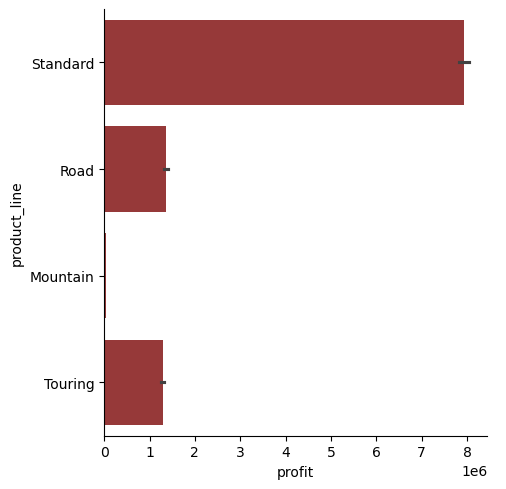

In [204]:
sns.catplot(y=D['product_line'],x=D['profit'],kind='bar',estimator='sum',color='brown')
plt.show()

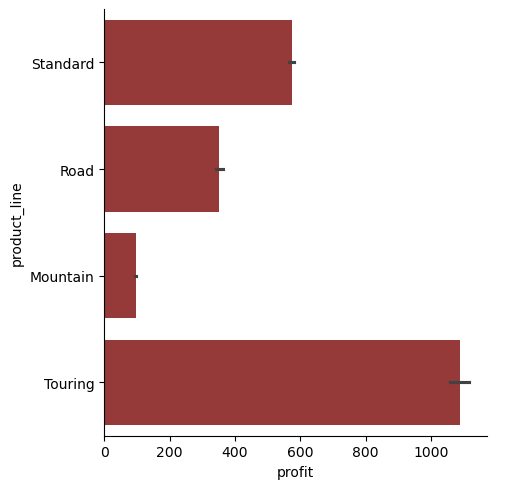

In [205]:
sns.catplot(y=D['product_line'],x=D['profit'],kind='bar',estimator='mean',color='brown')
plt.show()

In [206]:
D.groupby('product_size')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
product_size,,,,,,,,
large,3879.0,915.289750,538.247060,4.80,445.21,957.02,1305.25,1702.55
medium,12680.0,527.875921,450.960770,14.23,133.38,448.68,802.26,1660.88
small,2761.0,141.918740,54.656008,43.97,75.75,152.55,189.28,217.51


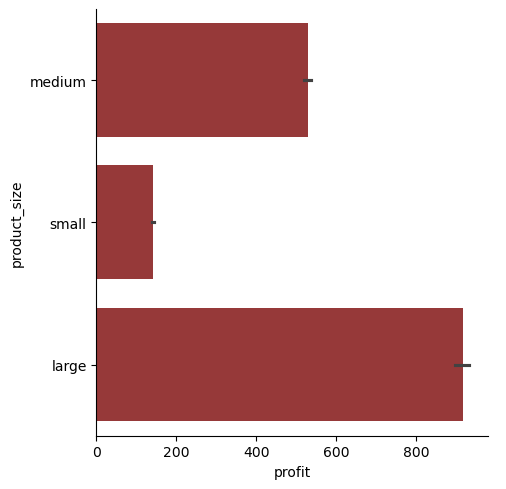

In [207]:
sns.catplot(y=D['product_size'],x=D['profit'],kind='bar',estimator='mean',color='brown')
plt.show()

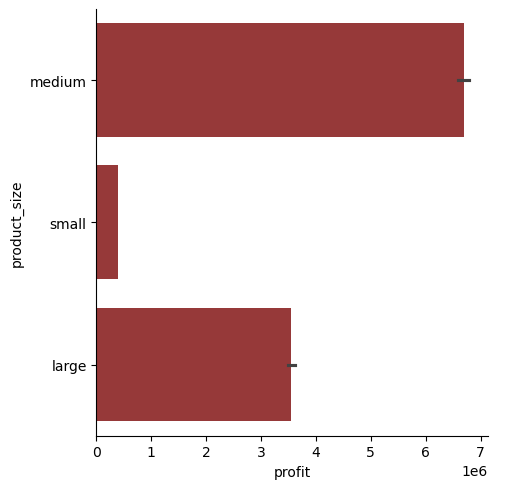

In [208]:
sns.catplot(y=D['product_size'],x=D['profit'],kind='bar',estimator='sum',color='brown')
plt.show()

In [209]:
D.groupby('product_class')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
product_class,,,,,,,,
high,2945.0,370.663301,219.594681,4.80,198.29,409.86,509.97,802.26
low,2904.0,404.889091,464.707501,14.23,75.75,139.23,745.94,1544.61
medium,13471.0,621.209407,524.157221,15.08,143.82,456.45,1028.76,1702.55


In [210]:
D.groupby('months')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
months,,,,,,,,
April,1595.0,550.002013,494.176362,4.8,133.78,437.46,828.70,1702.55
August,1690.0,555.902166,494.727187,4.8,135.85,445.21,827.16,1702.55
December,1581.0,539.895629,487.624333,4.8,133.78,437.46,827.16,1702.55
February,1584.0,539.297771,481.231669,4.8,135.85,437.46,817.36,1702.55
January,1620.0,557.480216,499.752704,4.8,135.85,445.21,827.16,1702.55
July,1649.0,551.147956,499.959634,4.8,129.01,437.46,830.24,1702.55
June,1521.0,546.839198,483.150303,4.8,135.85,445.21,827.16,1702.55
March,1589.0,536.761378,485.773830,4.8,129.01,437.46,817.36,1702.55
May,1638.0,548.453883,489.984818,4.8,133.78,445.21,829.47,1702.55


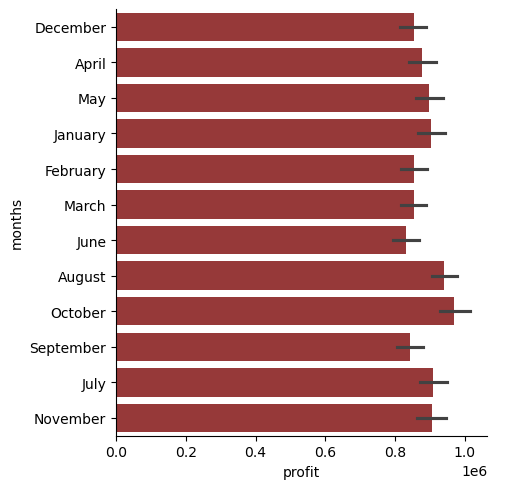

In [211]:
sns.catplot(y=D['months'],x=D['profit'],kind='bar',estimator='sum',color='brown')
plt.show()

In [212]:
D.groupby('job_industry_category')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
job_industry_category,,,,,,,,
Argiculture,566.0,535.320406,474.110701,4.8,136.695,437.460,812.44,1702.55
Entertainment,694.0,556.353674,486.892793,4.8,139.230,445.210,834.94,1702.55
Financial Services,3798.0,560.874737,498.472305,4.8,133.780,448.680,834.94,1702.55
Health,3040.0,541.074595,494.654266,4.8,133.380,431.330,827.16,1702.55
IT,691.0,541.469942,508.875936,4.8,133.580,409.860,817.36,1702.55
Manufacturing,3962.0,545.074717,488.689712,4.8,133.780,445.210,827.16,1702.55
Others,3192.0,553.930705,492.310624,4.8,135.850,445.210,827.93,1702.55
Property,1278.0,547.839789,485.115211,4.8,135.850,445.210,827.16,1702.55
Retail,1747.0,562.172642,497.093056,4.8,135.850,448.680,872.89,1702.55


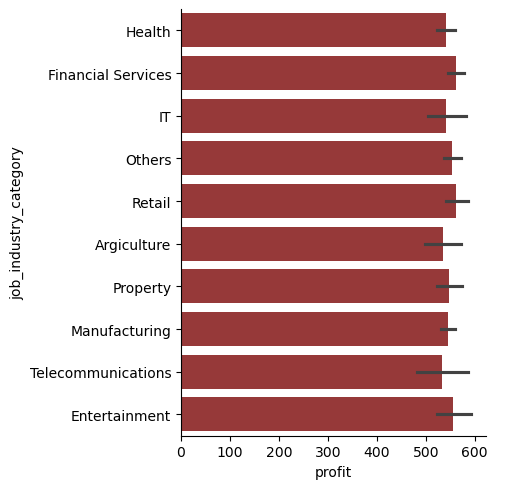

In [213]:
sns.catplot(y=D['job_industry_category'],x=D['profit'],kind='bar',estimator='mean',color='brown')
plt.show()

In [214]:
D.groupby('wealth_segment')["profit"].describe()

,count,mean,std,min,25%,50%,75%,max
wealth_segment,,,,,,,,
Affluent Customer,4712.0,554.815335,493.753028,4.8,135.3325,448.68,830.24,1702.55
High Net Worth,4926.0,548.484895,495.615797,4.8,133.7800,445.21,830.24,1702.55
Mass Customer,9682.0,549.430572,491.160296,4.8,133.7800,445.21,827.16,1702.55


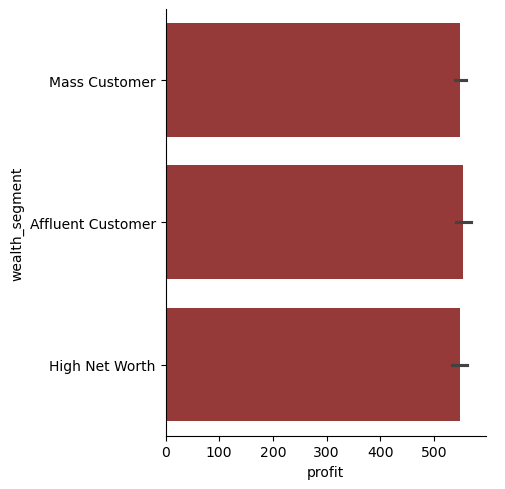

In [215]:
sns.catplot(y=D['wealth_segment'],x=D['profit'],kind='bar',estimator='mean',color='brown')
plt.show()

In [216]:
pd.crosstab(R_D['state'],R_D["wealth_segment"],margins=1)

wealth_segment,Affluent Customer,High Net Worth,Mass Customer,All
state,,,,
NSW,486,519,998,2003
New South Wales,28,16,41,85
QLD,209,205,407,821
VIC,215,238,465,918
Victoria,23,17,39,79
All,961,995,1950,3906


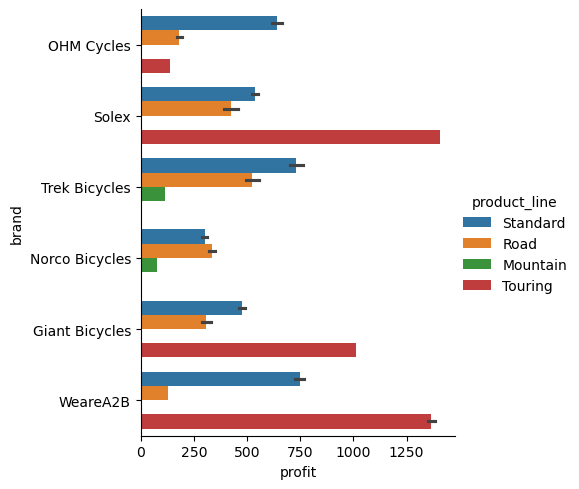

In [217]:
sns.catplot(y=D['brand'],x=D['profit'],hue=D['product_line'],kind='bar',estimator='mean')
plt.show()

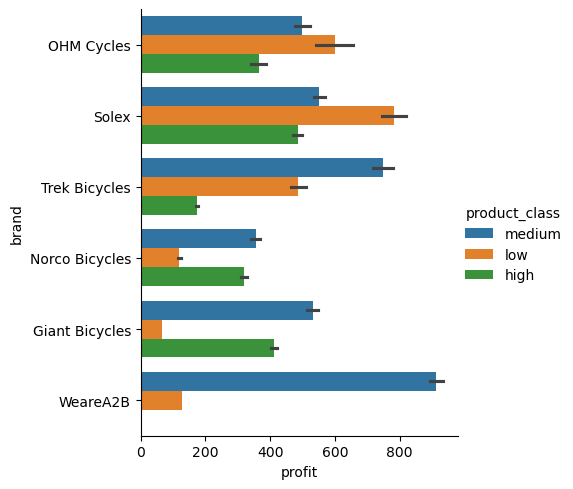

In [218]:
sns.catplot(y=D['brand'],x=D['profit'],hue=D['product_class'],kind='bar',estimator='mean')
plt.show()

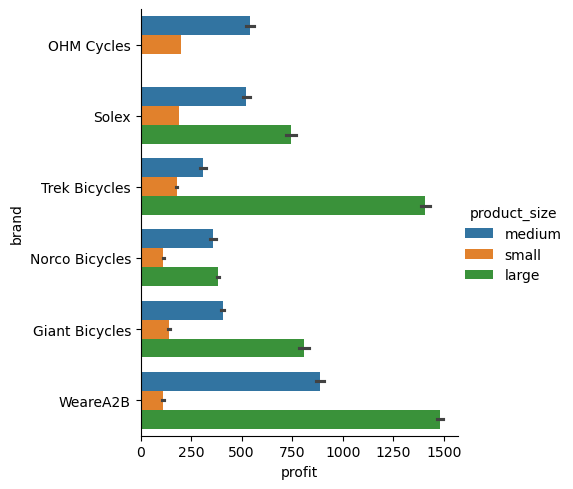

In [219]:
sns.catplot(y=D['brand'],x=D['profit'],hue=D['product_size'],kind='bar',estimator='mean')
plt.show()

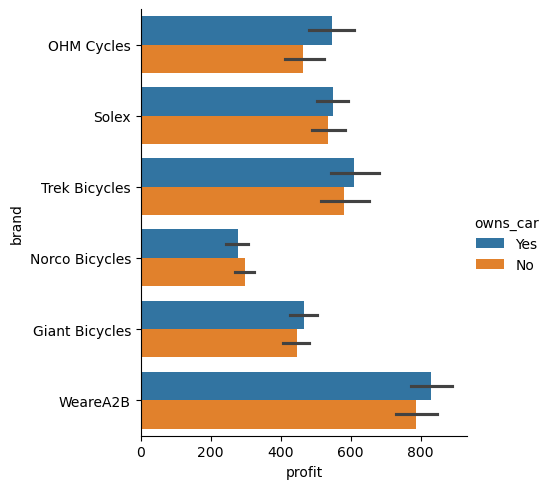

In [220]:
sns.catplot(y=D['brand'],x=D['profit'],hue=R_D['owns_car'],kind='bar',estimator='mean')
plt.show()

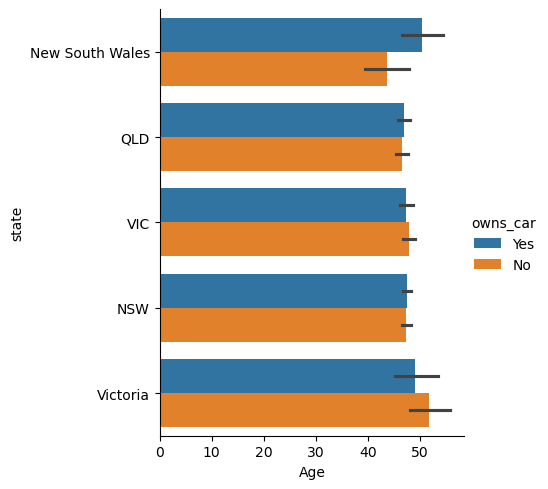

In [221]:
sns.catplot(y=R_D['state'],x=R_D['Age'],hue=R_D['owns_car'],kind='bar',estimator='mean')
plt.show()

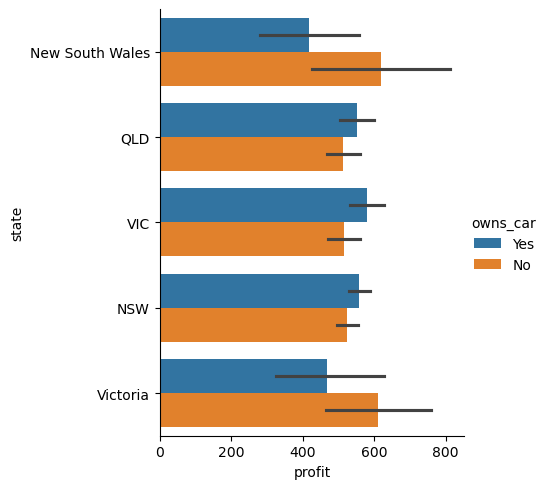

In [222]:
sns.catplot(y=R_D['state'],x=D['profit'],hue=R_D['owns_car'],kind='bar',estimator='mean')
plt.show()

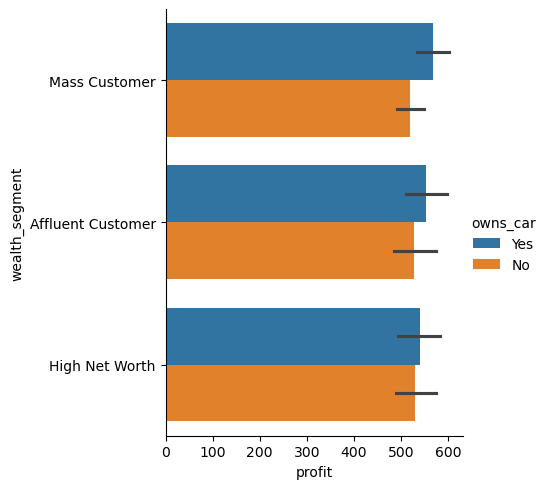

In [223]:
sns.catplot(y=R_D['wealth_segment'],x=D['profit'],hue=R_D['owns_car'],kind='bar',estimator='mean')
plt.show()